# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [ ]:
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7f8bdcefc610>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.750.jpg', 'cat.518.jpg', 'cat.353.jpg', 'cat.126.jpg', 'cat.957.jpg', 'cat.546.jpg', 'cat.858.jpg', 'cat.933.jpg', 'cat.563.jpg', 'cat.710.jpg']
['dog.639.jpg', 'dog.368.jpg', 'dog.420.jpg', 'dog.560.jpg', 'dog.115.jpg', 'dog.97.jpg', 'dog.400.jpg', 'dog.569.jpg', 'dog.839.jpg', 'dog.629.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de trenes y validación:

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuroanl convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


In [ ]:
import tensorflow as tf
# tu código para la red neuronal del ejercicio 1 aquí
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dropout

model = models.Sequential()

#Capa con 32 filtros y un kernel de 3x3 y un input shape de 150x150 y tres canales rgb (imagenes de entrenamiento)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#Capa pooling para seleccionar las mejores caracteristicas
model.add(layers.MaxPooling2D((2, 2)))
#Aumentamos el número de filtros
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 'Aplanamos' las últimas capas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#Como es una clasificación binaria utilizamos activación sigmoid
model.add(layers.Dense(1, activation='sigmoid'))



Se comprueba el modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [ ]:
# tu código para la compilación del ejercicio 2 aquí

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics = ['accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación.

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [ ]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,  
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps= validation_steps,  
                    verbose=2)

Epoch 1/100
100/100 - 41s - loss: 0.6951 - accuracy: 0.5360 - val_loss: 0.6390 - val_accuracy: 0.6480
Epoch 2/100
100/100 - 10s - loss: 0.6303 - accuracy: 0.6425 - val_loss: 0.6211 - val_accuracy: 0.6710
Epoch 3/100
100/100 - 10s - loss: 0.5742 - accuracy: 0.7070 - val_loss: 0.5818 - val_accuracy: 0.7010
Epoch 4/100
100/100 - 10s - loss: 0.5189 - accuracy: 0.7460 - val_loss: 0.5676 - val_accuracy: 0.7090
Epoch 5/100
100/100 - 10s - loss: 0.4728 - accuracy: 0.7930 - val_loss: 0.6006 - val_accuracy: 0.6640
Epoch 6/100
100/100 - 10s - loss: 0.4368 - accuracy: 0.7960 - val_loss: 0.5653 - val_accuracy: 0.7030
Epoch 7/100
100/100 - 10s - loss: 0.3984 - accuracy: 0.8290 - val_loss: 0.6057 - val_accuracy: 0.6920
Epoch 8/100
100/100 - 10s - loss: 0.3628 - accuracy: 0.8480 - val_loss: 0.5591 - val_accuracy: 0.7160
Epoch 9/100
100/100 - 9s - loss: 0.3269 - accuracy: 0.8655 - val_loss: 0.5776 - val_accuracy: 0.7120
Epoch 10/100
100/100 - 10s - loss: 0.2893 - accuracy: 0.8950 - val_loss: 0.5912 - v

# 4. Evaluando la precisión y la perdida del modelo


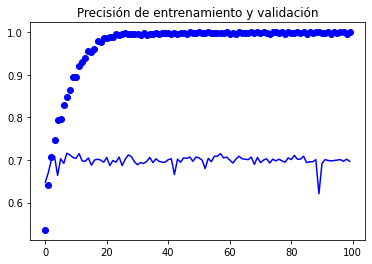

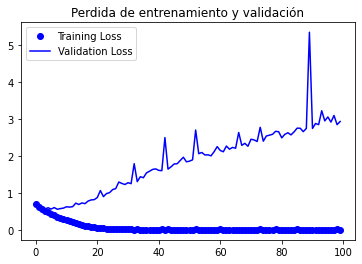

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

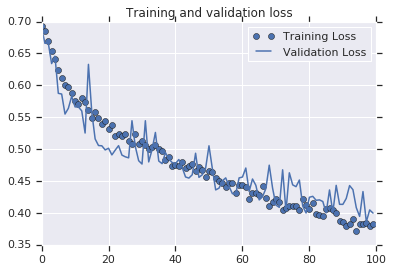
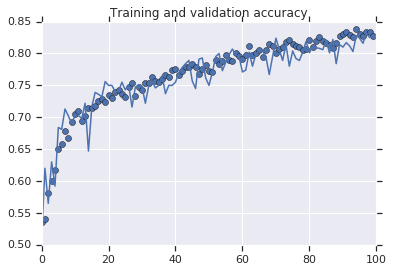

# Data Augmentation

La primera técnica que vamos a utilizar es Data Augmentation. Gracias a esto podremos aumentar el numero de muestras para entrenar nuestra CNN.

In [ ]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###


from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator(rotation_range=45,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

for fname in train_cat_fnames:
    i = 0
    img = load_img(train_cats_dir+"/"+fname)  
    x = img_to_array(img)  
    x = x.reshape((1,) + x.shape)
    for batch in train_datagen.flow(x, batch_size=1, save_to_dir=train_cats_dir,
                                    save_prefix='cat', save_format='jpeg'):
        i += 1
        if i > 20:
            break


for fname in train_dog_fnames:
    i = 0
    img = load_img(train_dogs_dir+"/"+fname)
    x = img_to_array(img)  
    x = x.reshape((1,) + x.shape)
    for batch in train_datagen.flow(x, batch_size=1, save_to_dir=train_dogs_dir,
                                    save_prefix='dog', save_format='jpeg'):
        i += 1
        if i > 20:
            break


test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


##TODO: METER regularización L2 y dropout en cada capa para el modelo y reentrenar


Found 19551 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Dropout y mejoras en la arquitectura

*   Elemento de lista
*   Elemento de lista



Ahora diseñaremos nuestro modelo utilizando técnicas para evitar el overfiting. 

* DropOut: Desactiva aleatoriamente neuronass para evitar el sobre ajuste

* Mejora de la arquitectura: Se han aumentado el número de filtros en las capas de la arquitectura inicial y la función de activvación final por softmax





In [ ]:
from tensorflow.keras import regularizers

new_model = models.Sequential()

#Capa con 32 filtros y un kernel de 3x3 y un input shape de 150x150 y tres canales rgb (imagenes de entrenamiento)
new_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#Capa pooling para seleccionar las mejores caracteristicas
new_model.add(layers.MaxPooling2D((2, 2)))
#Aumentamos el número de filtros
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(Dropout(0.5))
# 'Aplanamos' las últimas capas
new_model.add(layers.Flatten())
new_model.add(layers.Dense(512, activation='relu'))
new_model.add(layers.Dense(2, activation='softmax'))

In [ ]:
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
new_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_size = 128
steps_per_epoch = (train_generator.n + batch_size - 1)// batch_size
validation_steps = (validation_generator.n + batch_size - 1)// batch_size

history = new_model.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,  
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps= validation_steps,  
                    verbose=2)

Epoch 1/100
153/153 - 26s - loss: 0.6962 - accuracy: 0.4920 - val_loss: 0.6913 - val_accuracy: 0.5562
Epoch 2/100
153/153 - 25s - loss: 0.6920 - accuracy: 0.5242 - val_loss: 0.6811 - val_accuracy: 0.6313
Epoch 3/100
153/153 - 25s - loss: 0.6791 - accuracy: 0.5487 - val_loss: 0.6361 - val_accuracy: 0.6062
Epoch 4/100
153/153 - 25s - loss: 0.6679 - accuracy: 0.5644 - val_loss: 0.6940 - val_accuracy: 0.5063
Epoch 5/100
153/153 - 25s - loss: 0.6900 - accuracy: 0.5190 - val_loss: 0.6911 - val_accuracy: 0.5437
Epoch 6/100
153/153 - 25s - loss: 0.6881 - accuracy: 0.5350 - val_loss: 0.6827 - val_accuracy: 0.5688
Epoch 7/100
153/153 - 25s - loss: 0.6887 - accuracy: 0.5163 - val_loss: 0.6743 - val_accuracy: 0.6000
Epoch 8/100
153/153 - 25s - loss: 0.6903 - accuracy: 0.5386 - val_loss: 0.6891 - val_accuracy: 0.5375
Epoch 9/100
153/153 - 25s - loss: 0.6973 - accuracy: 0.5225 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 10/100
153/153 - 25s - loss: 0.6848 - accuracy: 0.5474 - val_loss: 0.6696 - 

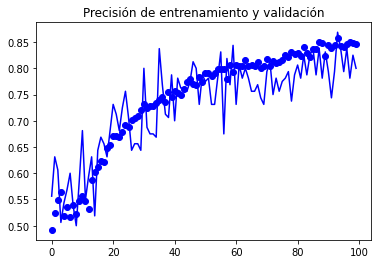

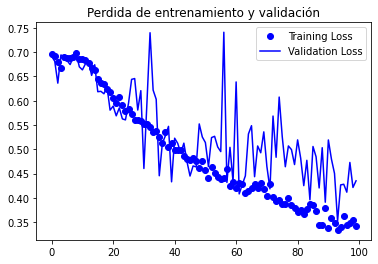

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

# Transfer learning

*   Data Augmentation
*   Transfer learning

In [ ]:

import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7f40f7e56d50>)

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.874.jpg', 'cat.464.jpg', 'cat.420.jpg', 'cat.219.jpg', 'cat.169.jpg', 'cat.702.jpg', 'cat.299.jpg', 'cat.909.jpg', 'cat.862.jpg', 'cat.766.jpg']
['dog.910.jpg', 'dog.29.jpg', 'dog.696.jpg', 'dog.212.jpg', 'dog.393.jpg', 'dog.917.jpg', 'dog.202.jpg', 'dog.939.jpg', 'dog.590.jpg', 'dog.243.jpg']


In [ ]:

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), include_top= False, weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers: 
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense (1, activation = 'sigmoid')(x)


In [ ]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255., 
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size= 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150))

Found 2000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        batch_size = 20,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))


Found 1000 images belonging to 2 classes.


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,
                    steps_per_epoch= steps_per_epoch,  
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps= validation_steps,  
                    verbose=2)

Epoch 1/100
100/100 - 30s - loss: 1.2712 - acc: 0.8365 - val_loss: 0.1774 - val_acc: 0.9480
Epoch 2/100
100/100 - 23s - loss: 0.4099 - acc: 0.8855 - val_loss: 0.1611 - val_acc: 0.9520
Epoch 3/100
100/100 - 22s - loss: 0.3575 - acc: 0.9030 - val_loss: 0.1763 - val_acc: 0.9540
Epoch 4/100
100/100 - 23s - loss: 0.3647 - acc: 0.9020 - val_loss: 0.2586 - val_acc: 0.9330
Epoch 5/100
100/100 - 21s - loss: 0.3669 - acc: 0.9065 - val_loss: 0.2370 - val_acc: 0.9430
Epoch 6/100
100/100 - 22s - loss: 0.3512 - acc: 0.9120 - val_loss: 0.1631 - val_acc: 0.9540
Epoch 7/100
100/100 - 21s - loss: 0.3103 - acc: 0.9145 - val_loss: 0.1536 - val_acc: 0.9600
Epoch 8/100
100/100 - 22s - loss: 0.2977 - acc: 0.9205 - val_loss: 0.4406 - val_acc: 0.9190
Epoch 9/100
100/100 - 22s - loss: 0.3343 - acc: 0.9150 - val_loss: 0.1474 - val_acc: 0.9590
Epoch 10/100
100/100 - 21s - loss: 0.2731 - acc: 0.9295 - val_loss: 0.5146 - val_acc: 0.9010
Epoch 11/100
100/100 - 21s - loss: 0.2662 - acc: 0.9225 - val_loss: 0.1666 - va

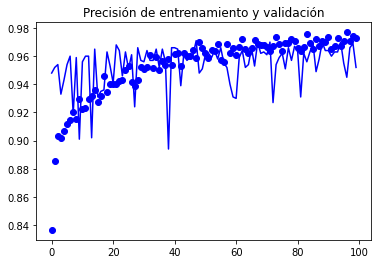

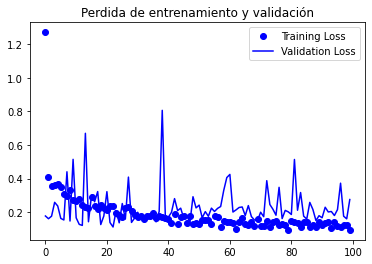

In [ ]:
 #-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()